In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [4]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
df.corr()['fetal_health'].sort_values()

accelerations                                            -0.364066
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
mean_value_of_long_term_variability                      -0.226797
histogram_median                                         -0.205033
uterine_contractions                                     -0.204894
histogram_tendency                                       -0.131976
mean_value_of_short_term_variability                     -0.103382
histogram_width                                          -0.068789
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.023666
histogram_number_of_zeroes                               -0.016682
light_decelerations                                       0.058870
histogram_min                                             0.063175
fetal_movement                                            0.08

<AxesSubplot: >

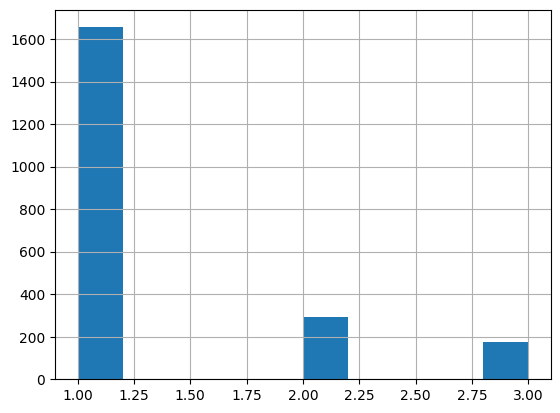

In [18]:
df['fetal_health'].hist()

In [19]:
y = df['fetal_health']
X = df.drop('fetal_health', axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
df_std = std.fit_transform(X)

In [22]:
df_std = pd.DataFrame(df_std, index = X.index, columns = X.columns)

In [25]:
df_std

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.822388,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.282833,0.823885,...,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173,-0.524526
2122,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.660775,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656,1.112980
2123,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.056341,0.552035,...,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138,1.112980
2124,0.680604,-0.563635,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.932624,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138,1.112980


In [32]:
split_id = int(df_std.shape[0]*0.75)
train_X = df_std[:split_id]
train_y = y[:split_id]
test_X = df_std[split_id:]
test_y = y[split_id:]

1594    1.0
1595    1.0
1596    1.0
1597    1.0
1598    1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 532, dtype: float64

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)
rf_pred = rf.predict(test_X)


In [40]:
from sklearn.metrics import f1_score, accuracy_score
f1_rf = f1_score(test_y, rf_pred, average='weighted')
print(f1_rf)
acc_rf = accuracy_score(test_y, rf_pred)
print(acc_rf)

0.7641764753439575
0.6616541353383458


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_X, train_y)
knn_pred = knn.predict(test_X)
knn_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
       1., 1., 1., 1., 1.

In [46]:
f1_knn = f1_score(test_y, knn_pred, average='micro')
print(f1_knn)
acc_knn = accuracy_score(test_y, knn_pred)
print(acc_knn)

0.7781954887218046
0.7781954887218046


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)
gbc_pred = gbc.predict(test_X)
gbc_pred

array([1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 2., 2., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 3., 3., 3., 3., 3., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 1., 1., 1., 1.

In [50]:
f1_gbc = f1_score(test_y, gbc_pred, average='micro')
print(f1_gbc)
acc_gbc = accuracy_score(test_y, gbc_pred)
print(acc_gbc)

0.6015037593984962
0.6015037593984962


<BarContainer object of 3 artists>

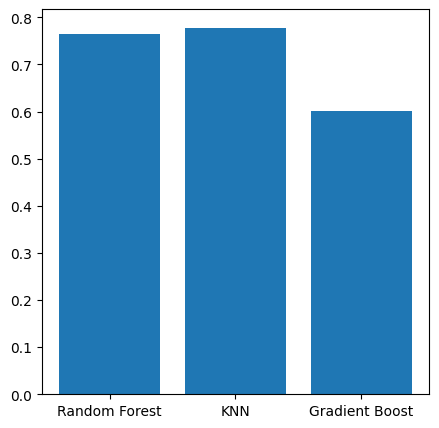

In [56]:
plt.figure(figsize=(5,5))
labels = ['Random Forest', 'KNN', 'Gradient Boost']
acc = [f1_rf, f1_knn, f1_gbc]
plt.bar(labels, acc)

In [62]:
df.corr()['fetal_health'].sort_values()

accelerations                                            -0.364066
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
mean_value_of_long_term_variability                      -0.226797
histogram_median                                         -0.205033
uterine_contractions                                     -0.204894
histogram_tendency                                       -0.131976
mean_value_of_short_term_variability                     -0.103382
histogram_width                                          -0.068789
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.023666
histogram_number_of_zeroes                               -0.016682
light_decelerations                                       0.058870
histogram_min                                             0.063175
fetal_movement                                            0.08

In [73]:
#removed couple of the least correlated features to see if the performance increases
chosen = df.drop(['fetal_health', 'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'light_decelerations','histogram_max'], axis=1)
chosen

split_id = int(df.shape[0]*0.75)
train_X_ch = chosen[:split_id]
train_y = y[:split_id]
test_X_ch = chosen[split_id:]
test_y = y[split_id:]

In [74]:
knn.fit(train_X_ch, train_y)
knn_ch = knn.predict(test_X_ch)
f1_knn_ch = f1_score(test_y, knn_ch, average='micro')
print(f1_knn_ch)
acc_knn_ch = accuracy_score(test_y, knn_ch)
print(acc_knn_ch)

0.7612781954887218
0.7612781954887218


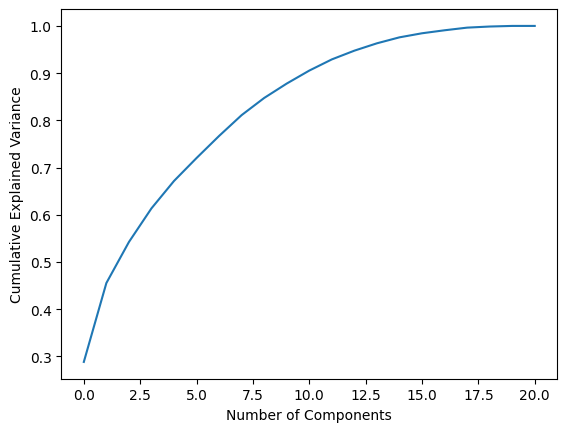

In [58]:
#KNN Looks promising, let's see if we can improve it by performing some feature engineering
from sklearn.decomposition import PCA

pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [84]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_std)
pca_df = pd.DataFrame(df_pca, index = df_std.index)
pca_df


,0,1,2,3,4,5,6,7,8,9
0,-0.263977,-2.568375,1.302902,1.826119,0.379183,-0.326087,-2.254560,-0.533575,0.252293,0.456495
1,1.954458,2.230317,-1.090115,-0.501233,-0.226035,0.672451,0.793729,-0.555810,0.236623,-0.550629
2,1.971485,1.968333,-1.286533,-0.210096,-0.554692,0.411061,1.554747,-0.145268,-0.204309,-0.554284
3,2.222056,2.134027,-2.190836,1.601091,-0.046659,-0.428954,0.507563,0.390144,-1.804148,-0.229709
4,1.785438,2.190154,-2.508413,0.740641,0.267545,-0.259766,-0.109299,0.243573,-1.238910,0.326136
...,...,...,...,...,...,...,...,...,...,...
2121,-2.830562,0.099646,1.441883,-0.671104,-0.505667,0.153606,0.888821,-0.166277,-0.759249,-0.180270
2122,-2.031993,0.860059,1.244167,0.558820,-0.560077,-0.459273,-0.358088,-0.002021,-0.818504,0.344133
2123,-2.110176,0.850040,1.305417,0.402711,-0.632609,-0.501208,-0.397261,0.058815,-0.756095,0.405486
2124,-2.104270,0.793400,1.390622,0.711009,-0.407499,-0.342560,-0.442023,-0.134593,-0.765396,0.239976


In [85]:
split_id = int(pca_df.shape[0]*0.75)
train_X_pca = pca_df[:split_id]
train_y = y[:split_id]
test_X_pca = pca_df[split_id:]
test_y = y[split_id:]

In [87]:
knn.fit(train_X_pca, train_y)
pca_pred = knn.predict(test_X_pca)
pca_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
       1., 1., 1., 1., 1.

In [88]:
f1_pca = f1_score(test_y, pca_pred, average='weighted')
print(f1_pca)
acc_pca = accuracy_score(test_y, pca_pred)
print(acc_pca)

0.771070595802694
0.7894736842105263


In [ ]:
#parameter tuning